Run all cells below to train the agent for the continuous control task.

### 1. Import the Unity environment and python libraries.

In [1]:
from unityagents import UnityEnvironment

import torch
import numpy as np
import matplotlib.pyplot as plt

from collections import deque
from ddpg_agent import Agent

### 2. Check that GPU is available.

In [3]:
torch.cuda.is_available()

True

**_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")

### 3. Start the Unity environment.

In [4]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 4. Set the default brain for the environment.

In [5]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 5. Examine the State and Action Spaces

- The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.

- Each action is a vector with four numbers, corresponding to torque applicable to two joints.

- Every entry in the action vector must be a number between `-1` and `1`.

- This task utilises a single agent.

When training the environment, set train_mode=True.

In [6]:
env_info = env.reset(train_mode=True)[brain_name]  # reset the environment 

In [7]:
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

Number of agents: 1


In [8]:
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

Size of each action: 4


In [9]:
states = env_info.vector_observations
state_size = states.shape[1]
state_size

33

### 6. Initialize the agent.

In [12]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=101)

### 7. Define the function which trains the agent.  The algorithm is deep deterministic policy gradient (DDPG).

In [13]:
def ddpg(n_episodes=500, max_t=1000):
    
    scores_deque = deque(maxlen=100) 
    scoresByEpisode = []
    
    for i_episode in range(1, n_episodes+1):
        
        agentScores = np.zeros(num_agents)                     # initialize the score (for each agent)
        
        env_info = env.reset(train_mode=True)[brain_name]  
        states = env_info.vector_observations                  # get the current state (for each agent) 
 
        
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            agent.step(states, actions, rewards, next_states, dones)
            agentScores +=  env_info.rewards                   # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            
            if np.any(dones):                                  # exit loop if episode finished
                break
        
        episodeScore = np.mean(agentScores)
        scores_deque.append(episodeScore)
        scoresByEpisode.append(episodeScore)
        
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        
        if np.mean(scores_deque) >= 30:
            print('\r Environment Solved in Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scoresByEpisode

### 8. Run the DDPG algorithm.

In [14]:
scores = ddpg(n_episodes=400)

Episode 10	Average Score: 0.74
Episode 20	Average Score: 0.84
Episode 30	Average Score: 0.88
Episode 40	Average Score: 0.81
Episode 50	Average Score: 0.71
Episode 60	Average Score: 0.74
Episode 70	Average Score: 0.85
Episode 80	Average Score: 0.97
Episode 90	Average Score: 1.17
Episode 100	Average Score: 1.40
Episode 110	Average Score: 1.73
Episode 120	Average Score: 2.19
Episode 130	Average Score: 2.80
Episode 140	Average Score: 3.49
Episode 150	Average Score: 4.64
Episode 160	Average Score: 5.40
Episode 170	Average Score: 6.82
Episode 180	Average Score: 8.21
Episode 190	Average Score: 10.36
Episode 200	Average Score: 12.51
Episode 210	Average Score: 14.95
Episode 220	Average Score: 17.64
Episode 230	Average Score: 20.09
Episode 240	Average Score: 23.15
Episode 250	Average Score: 25.59
Episode 260	Average Score: 28.18
 Environment Solved in Episode 269	Average Score: 30.05


### 9. Plot the performance of the agent on the continuous control task.

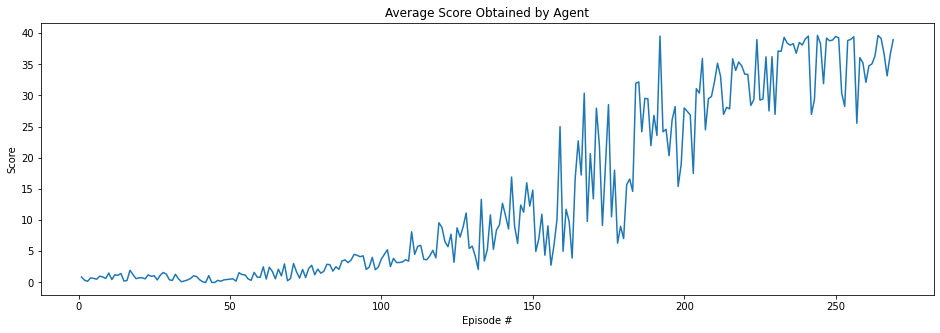

In [18]:
plt.rcParams['figure.figsize'] = 16, 5

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Average Score Obtained by Agent');

### 10. Close the environment.

In [ ]:
#env.close()